In [1]:
import numpy as np
import pandas as pd
import linecache
import ctypes

In [2]:
# Model for suggesting the learning sequence in terms of LO, it gives the learning sequence for each student to learn effectively
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
df=pd.ExcelFile('Data_Set_1 (1).xlsx')
data1=pd.read_excel(df,"Students' Data")
data2=pd.read_excel(df,"Question - LO Codes")
data3=pd.read_excel(df,"Sheet1")
data4=pd.read_excel(df,"Sheet2")

data1.columns = data1.iloc[0]
data1.drop(["Stu36","PriKey36","Points36","Mark36","Stu37","PriKey37","Points37","Mark37","Stu38","PriKey38","Points38",
          "Mark38","Stu39","PriKey39","Points39","Mark39","Stu40","PriKey40","Points40","Mark40"],axis=1,inplace=True)
data1=data1.drop(data1.index[0])
data2.drop(["Unnamed: 3","Unnamed: 4","LO","Sub LO"],axis=1,inplace=True)
data1.reset_index(inplace = True)

w,h = 11,35;
b=[[0 for x in range(w)] for y in range(h)]
prob=[[0 for x in range(w)] for y in range(h)]
q=[[0 for x in range(w)] for y in range(h)]
info=[[0 for x in range(w)] for y in range(h)]
a=[0]*35
result_lo = []
for i in range(0,35):
    rslt_df=data1[data1['StudentID']==data1['StudentID'][i]]
    rslt_df=rslt_df.reset_index()
    del rslt_df['index']
    results=[]
    for j in range(8,rslt_df.shape[1],4):
        results.append(rslt_df.iloc[0][j])
    #print(results)
    lo_codes=[1]*11
    for k in range(0,len(results)):
        if results[k]=='C':
            code_df=data2[data2['Question Number'] == k+1]
            code_df=code_df.reset_index()
            del code_df['index']
            s = code_df['LO Code'].str.split(',')
            for l in range(0,len(s[0])):
                if s[0][l]=='L1':
                    lo_codes[0]+=1
                if s[0][l]=='L2':
                    lo_codes[1]+=1
                if s[0][l]=='L3':
                    lo_codes[2]+=1
                if s[0][l]=='L4':
                    lo_codes[3]+=1
                if s[0][l]=='L5':
                    lo_codes[4]+=1
                if s[0][l]=='L6':
                    lo_codes[5]+=1
                if s[0][l]=='L7':
                    lo_codes[6]+=1
                if s[0][l]=='L8':
                    lo_codes[7]+=1
                if s[0][l]=='L9':
                    lo_codes[8]+=1
                if s[0][l]=='L10':
                    lo_codes[9]+=1
                if s[0][l]=='L11':
                    lo_codes[10]+=1
    
    #print(lo_codes)
    lo_codes[0]=float("{:.2f}".format(lo_codes[0]/19))
    lo_codes[1]=float("{:.2f}".format(lo_codes[1]/4))
    lo_codes[2]=float("{:.2f}".format(lo_codes[2]/6))
    lo_codes[3]=float("{:.2f}".format(lo_codes[3]/3))
    lo_codes[4]=float("{:.2f}".format(lo_codes[4]/5))
    lo_codes[5]=float("{:.2f}".format(lo_codes[5]/3))
    lo_codes[6]=float("{:.2f}".format(lo_codes[6]/3))
    lo_codes[7]=float("{:.2f}".format(lo_codes[7]/3))
    lo_codes[8]=float("{:.2f}".format(lo_codes[8]/7))
    lo_codes[9]=float("{:.2f}".format(lo_codes[9]/6))
    lo_codes[10]=float("{:.2f}".format(lo_codes[10]/6))
    #print(lo_codes)
    
    correct_ans=rslt_df['Earned Points'][0]
    total_ques=(rslt_df.shape[1]-4)/4
    score=(correct_ans/total_ques)
    #print(score)
    
    v=i
    if score<0.8:
        a[v]=np.log(score/(1-score))
        #print(a)
        exp=2.718281
        for m in range(0,len(lo_codes)):
            b[v][m]=np.log((1-lo_codes[m])/lo_codes[m])
            #print(b)
            prob[v][m]=pow(exp,(a[v]-b[v][m]))/(1+pow(exp,(a[v]-b[v][m])))
            q[v][m]=1-lo_codes[m]
            info[v][m]=lo_codes[m]*q[v][m]

for index in range(0,35):
    LO=['L1','L2','L3','L4','L5','L6','L7','L8','L9','L10','L11']
    
    for i in range(0, len(prob[index])):    
        for j in range(i+1, len(prob[index])):    
            if(prob[index][i] > prob[index][j]):    
                temp = prob[index][i]    
                prob[index][i] = prob[index][j]    
                prob[index][j] = temp
                temp=LO[i]
                LO[i]=LO[j]
                LO[j]=temp
    
    for k in range(0,len(prob[index])):
        if prob[index][k]>0.8:
            break
            
    #print(prob[index][:k])
    result_lo.append(LO[:k])

In [3]:
class Newnode :
    def __init__(self):
        self.key = -1 
        self.concept =" "
        self.neigh = []
        self.relation_w_n = []
        self.skills = []

In [4]:
def createnode(key,concept,skills,neighbours,relations):
    node = Newnode()
    node.key = key
    node.concept = concept
    node.neigh = neighbours
    node.skills = skills
    node.relation_w_n = relations
    return node

In [5]:
def update(key,key_node,relatives,relations):
    for i in range(len(relatives)):
        key_node[relatives[i]].neigh.append(key)
        key_node[relatives[i]].relation_w_n.append(-relations[i])

In [6]:
def printnode(n):
    #l = open("output.txt",'r').readlines()
    #node_printing = l[n+1].split()
    print("The concept is ",key_node[n].concept)
    neighbours = []
    for i in range(len(key_node[n].neigh)) :
        neighbours.append(key_node[key_node[n].neigh[i]].concept)
    print("The neighbours are " + str(neighbours))
    relations = []
    for i in range(len(key_node[n].relation_w_n)) :
        relations.append(key_node[n].relation_w_n[i])
    print("The relation with neighnours are " + str(relations))
    print("The skills of this concept is "+ str(key_node[n].skills))

In [7]:
def deletenode(n,key_node,all_relations_for_graph,G):
    G.remove_node(n)
    all_relations_for_graph = G.edges()
    key_node[n]="Deleted"
    lines = open("output.txt",'r').readlines()
    lines[n-1] = str(n) + " Deleted\n" 
    out = open("output.txt",'w')
    out.writelines(lines)
    out.close()
    return key_node, all_relations_for_graph, G

In [8]:
def editnode(n,concept,skills,neighbours,relations,G,H,all_relations_for_graph):
    key_node[n].concept = concept
    key_node[n].skills = skills
    key_node[n].neigh = neighbours
    key_node[n].relations_w_n = relations
    G.remove_node(n)
    H.add_node(n)
    H.add_nodes_from(G.nodes())
    H.add_edges_from(G.edges())
    a = []
    for i in range(len(neighbours)):
        a.append((n,neighbours[i]))
    H.add_edges_from(a)
    del G
    return H,all_relations_for_graph

In [9]:
def bfs_traversal(G,root) :
    edges = nx.bfs_edges(G, root)
    nodes = [root] + [v for u, v in edges]
    return nodes


In [10]:
def get_levels(key_node):
    levels= {}
    levels[1] = 1
    for a in range(2,len(key_node)):
        b = key_node[a].relation_w_n[0]
        c = key_node[a].neigh[0]
        if(b==1):
            levels[a] = levels[c] + 1
        if(b==0):
            levels[a]=levels[c]
    return levels

In [11]:
def get_paths_util(u, d, visited, path,final_paths):
    visited[u]=True
    path.append(u)
    lines = open("output.txt",'r').readlines()
    u_node = (ctypes.cast(int(lines[u-1][2:-1]), ctypes.py_object).value)
    d_node=(ctypes.cast(int(lines[d-1][2:-1]), ctypes.py_object).value)
    if(u == d):
        #print(path)
        final_paths.append(np.array(path.copy()))
        path.pop()
        visited[u]=False
        return final_paths
        
    else :
        for i in u_node.neigh:
            #print(i)
            if(visited[i]==False) :
                final_paths = get_paths_util(i,d,visited,path,final_paths)
    path.pop()
    visited[u]=False
    return final_paths


In [12]:
def get_paths(s,d):
    lines = open("output.txt",'r').readlines()
    s_node = (ctypes.cast(int(lines[s-1][2:-1]), ctypes.py_object).value)
    d_node =(ctypes.cast(int(lines[d-1][2:-1]), ctypes.py_object).value)
    visited = [False]*(len(lines)+1)
    path = []
    final_paths = []
    final_paths = get_paths_util(s,d,visited,path,final_paths)
    return np.array(final_paths)

In [13]:
def get_shortest_path_util(path,student_ability,threshold):
    i = path[0]
    result = []
    difficulty = 0
    student_ability = np.array(student_ability)
    for j in path[1:-1]:
        lines = open("output.txt",'r').readlines()
        j_node_skills = np.array((ctypes.cast(int(lines[j-1][2:-1]), ctypes.py_object).value).skills)
        difference = np.sum(j_node_skills-student_ability)
        if(difference>threshold):
            result.append(j)
            difficulty = difference+difficulty
            student_ability = student_ability + 0.5*np.multiply(((student_ability-j_node_skills)>0),j_node_skills)
    result.append(path[len(path)-1])
    return result,difficulty

In [14]:
out_file = open("output.txt",'a+')
concept_data= open("Concepts_data.txt","r")
lines  = concept_data.readlines()
lines=[x.strip() for x in lines]
key_node = {}
all_relations_for_graph = []

In [15]:
for i in range(int(len(lines)/5)) :
    key = int(lines[5*i])
    concept = lines[5*i+1]
    skills = lines[5*i+2].split()
    neigh = lines[5*i+3].split()
    relation = lines[5*i+4].split()
    s = []
    n = []
    r = []
    for j in range(len(skills)) :
        s.append(float(skills[j]))
    if(neigh[0]!="-"):
        for j in range(len(neigh)):
            n.append(int(neigh[j]))
            r.append(int(relation[j]))
            all_relations_for_graph.append((key,int(neigh[j])))
    node = createnode(key,concept,s,n,r)
    key_node[key] = node
    update(key,key_node,n,r)

In [16]:
def getkeys_asarray(dict):
    return [*dict]
a = getkeys_asarray(key_node)
for i in range(len(a)):
    out_file.write(str(a[i])+" "+str(id(key_node[a[i]]))+"\n")
out_file.close()

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.Graph()

In [18]:
all_relations_for_graph

[(2, 1),
 (3, 1),
 (4, 1),
 (5, 2),
 (6, 2),
 (7, 3),
 (8, 4),
 (9, 4),
 (10, 4),
 (11, 4),
 (12, 6),
 (13, 6),
 (14, 6),
 (15, 8),
 (16, 8),
 (17, 11),
 (18, 17),
 (19, 17),
 (20, 17)]

C:\Users\adity\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


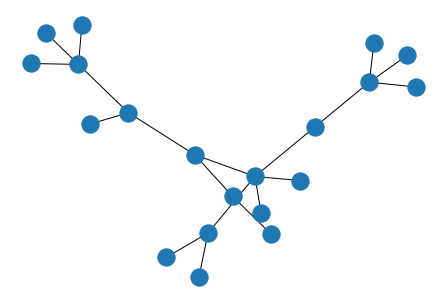

In [19]:
# adding just one node:
G.add_node(1)
# a list of nodes:
G.add_nodes_from(key_node.keys())
G.add_edges_from(all_relations_for_graph)
nx.draw(G)

In [20]:
#using printnode
printnode(2)

The concept is  Measurement
The neighbours are ['Length', 'Non-staandard units', 'Standard Units']
The relation with neighnours are [1, -1, -1]
The skills of this concept is [0.42, 0.56, 0.41, 0.22]


In [21]:
#getting levels
levels= get_levels(key_node)
levels

{1: 1,
 2: 2,
 3: 2,
 4: 2,
 5: 3,
 6: 3,
 7: 3,
 8: 3,
 9: 3,
 10: 3,
 11: 3,
 12: 4,
 13: 4,
 14: 4,
 15: 4,
 16: 4,
 17: 4,
 18: 5,
 19: 5}

In [22]:
#let us get the path for student 1
result_lo[0]

['L3', 'L4', 'L6', 'L7', 'L8', 'L1', 'L2', 'L9', 'L5', 'L10']

In [23]:
lo_with_concept = np.random.randint(1,20,size=11)

In [ ]:
def get_shortest_path(final_paths):
    paths_difficulty = []
    for i in range(1,final_paths.shape[0]+1):
        result,difficulty = get_shortest_path_util(final_paths[i-1],[0.4,0.41,0.22,0.13],0.2)
        paths_difficulty.append(difficulty)
    return final_paths[np.argmax(np.array(paths_difficulty))]


path = []    
for i in range(1,len(result_lo[0])):
    start_concept = lo_with_concept[int(result_lo[0][i-1][1])-1]
    target_concept = lo_with_concept[int(result_lo[0][i][1])-1]
    all_paths = get_paths(start_concept,target_concept)
    short_path = get_shortest_path(all_paths)
    for i in range(0,len(short_path)):
        a = short_path[i]
        if(not(a in path)) : path.append(a)

In [ ]:
path

In [ ]:
#using deletenode
key_node, all_relations_for_graph, G = deletenode(1,key_node,all_relations_for_graph,G)
nx.draw(G)

In [ ]:
#using editnode
H = nx.Graph()
G, all_relations_for_graph = editnode(2,"Concept 2",[0,0,0,0],[3,4,5],[0,0,-1],G,H,all_relations_for_graph)
nx.draw(G)

In [ ]:
#using traversal
nodes = bfs_traversal(G,2)
nodes
